In [6]:
# Needed for importing
import nbimporter
import performance_measure

Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb


In [9]:
from sklearn.tree import DecisionTreeClassifier
import performance_measure

def train_decision_tree(X_train,y_train,X_test):
    clf = DecisionTreeClassifier(criterion = "entropy", random_state=12)
    
    # Fitting DT
    clf.fit(X_train, y_train)
    
    # Predicting training samples
    y_train_pred = clf.predict(X_train)
    
    # Predicting testing samples
    y_test_pred = clf.predict(X_test)
    
    return clf, y_train_pred, y_test_pred

def get_decision_tree_model(X_train, X_test, y_train, y_test):
    print('Loading DT..')
    print('Training DT...')
    dt, y_train_pred, y_test_pred = train_decision_tree(X_train,y_train, X_test)
    print('Training Complete')
    
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test,y_test_pred)
    return dt    

Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.88888889 0.11111111 0.        ]
 [0.03846154 0.96153846 0.        ]
 [0.         0.13333333 0.86666667]]


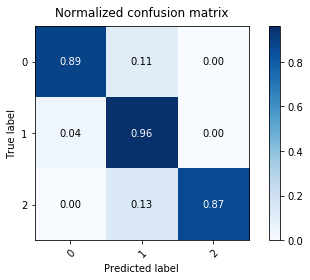

Plotting Performance Measure...
Total Accuracy 		0.915

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.941 		 0.889 		 0.914
1                         	 0.862 		 0.962 		 0.909
2                         	 1.000 		 0.867 		 0.929


In [10]:
# Testing:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

dt = get_decision_tree_model(X_train, X_test, y_train, y_test)